In [ ]:

import pandas as pd
from google.colab import files
uploaded = files.upload() # Upload your CSV file
df = pd.read_csv("ecom.csv") # Replace with your file name
df.head()

Saving ecom.csv to ecom.csv


,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Frequency,Last_Transaction_Days,Preferred_Category,Unnamed: 8,Unnamed: 9
0,1,56.0,Male,71663.0,96.0,11,75,Grocery,NaN,NaN
1,2,69.0,Male,35708.0,27.0,5,217,Grocery,NaN,NaN
2,3,46.0,Male,111906.0,63.0,1,277,NaN,NaN,NaN
3,4,32.0,Male,69811.0,96.0,8,249,Sports,NaN,NaN
4,5,60.0,Male,22811.0,68.0,12,164,Clothing,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

scaler = MinMaxScaler()
df[['Annual_Income', 'Spending_Score']] = scaler.fit_transform(df[['Annual_Income', 'Spending_Score']])

standard_scaler = StandardScaler()
df[['Purchase_Frequency']] = standard_scaler.fit_transform(df[['Purchase_Frequency']])

label_encoder = LabelEncoder()
df['Preferred_Category'] = label_encoder.fit_transform(df['Preferred_Category'])
print(df)

     Customer_ID   Age  Gender  Annual_Income  Spending_Score  \
0              1  56.0    Male       0.510244        0.978947   
1              2  69.0    Male       0.142305        0.252632   
2              3  46.0    Male       0.922063        0.631579   
3              4  32.0    Male       0.491291        0.978947   
4              5  60.0    Male       0.010325        0.684211   
..           ...   ...     ...            ...             ...   
100           84  32.0  Female       0.698823        0.621053   
101           54  43.0    Male       0.316302        0.052632   
102           71   NaN    Male       0.905342        0.168421   
103           46  26.0  Female       0.507624        0.863158   
104           45  38.0  Female       0.136605        0.452632   

     Purchase_Frequency  Last_Transaction_Days  Preferred_Category  \
0              0.251094                     75                   3   
1             -0.782824                    217                   3   
2        

In [ ]:
import pandas as pd
import numpy as np


df['Customer_Loyalty_Score'] = pd.cut(df['Spending_Score'] * df['Purchase_Frequency'],
                                      bins=[-1, 1000, 5000, np.inf],
                                      labels=['Low', 'Medium', 'High'])

df['Income_Level'] = pd.cut(df['Annual_Income'],
                            bins=[-1, 40000, 80000, np.inf],
                            labels=['Low', 'Medium', 'High'])

df['Engagement_Status'] = pd.cut(df['Last_Transaction_Days'] / df['Purchase_Frequency'],
                                 bins=[-1, 30, 180, np.inf],
                                 labels=['Active', 'Dormant', 'Churned'])
print(df)

In [ ]:
import pandas as pd
import numpy as np


df['Customer_Loyalty_Score'] = pd.cut(df['Spending_Score'] * df['Purchase_Frequency'],
                                      bins=[-1, 1000, 5000, np.inf],
                                      labels=['Low', 'Medium', 'High'])

df['Income_Level'] = pd.cut(df['Annual_Income'],
                            bins=[-1, 40000, 80000, np.inf],
                            labels=['Low', 'Medium', 'High'])

df['Engagement_Status'] = pd.cut(df['Last_Transaction_Days'] / df['Purchase_Frequency'],
                                 bins=[-1, 30, 180, np.inf],
                                 labels=['Active', 'Dormant', 'Churned'])
print(df)

     Customer_ID   Age  Gender  Annual_Income  Spending_Score  \
0              1  56.0    Male       0.510244        0.978947   
1              2  69.0    Male       0.142305        0.252632   
2              3  46.0    Male       0.922063        0.631579   
3              4  32.0    Male       0.491291        0.978947   
4              5  60.0    Male       0.010325        0.684211   
..           ...   ...     ...            ...             ...   
100           84  32.0  Female       0.698823        0.621053   
101           54  43.0    Male       0.316302        0.052632   
102           71   NaN    Male       0.905342        0.168421   
103           46  26.0  Female       0.507624        0.863158   
104           45  38.0  Female       0.136605        0.452632   

     Purchase_Frequency  Last_Transaction_Days  Preferred_Category  \
0              0.251094                     75                   3   
1             -0.782824                    217                   3   
2        

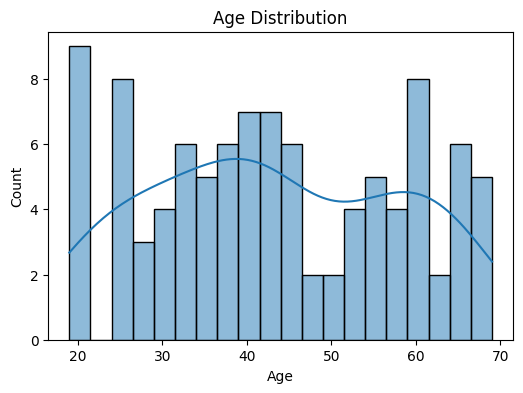

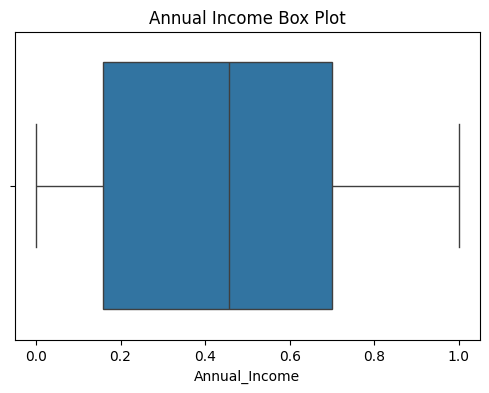

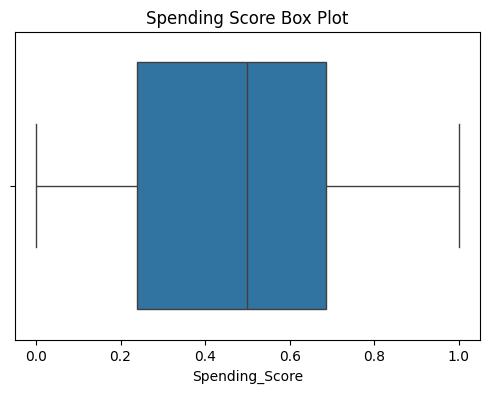

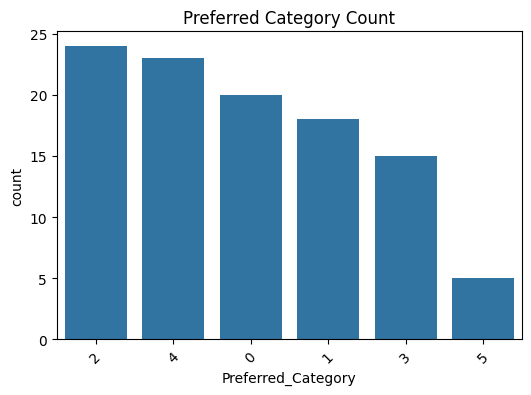

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Annual_Income'])
plt.title("Annual Income Box Plot")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Spending_Score'])
plt.title("Spending Score Box Plot")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df['Preferred_Category'], order=df['Preferred_Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Preferred Category Count")
plt.show()

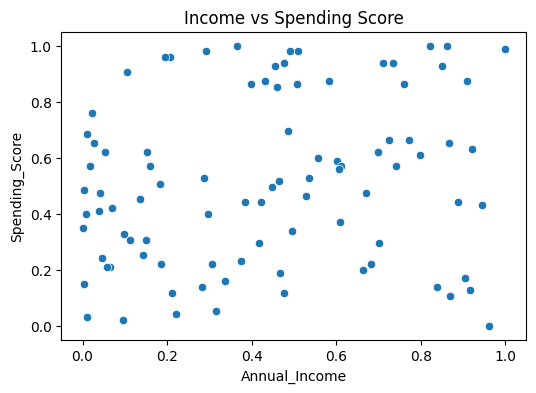

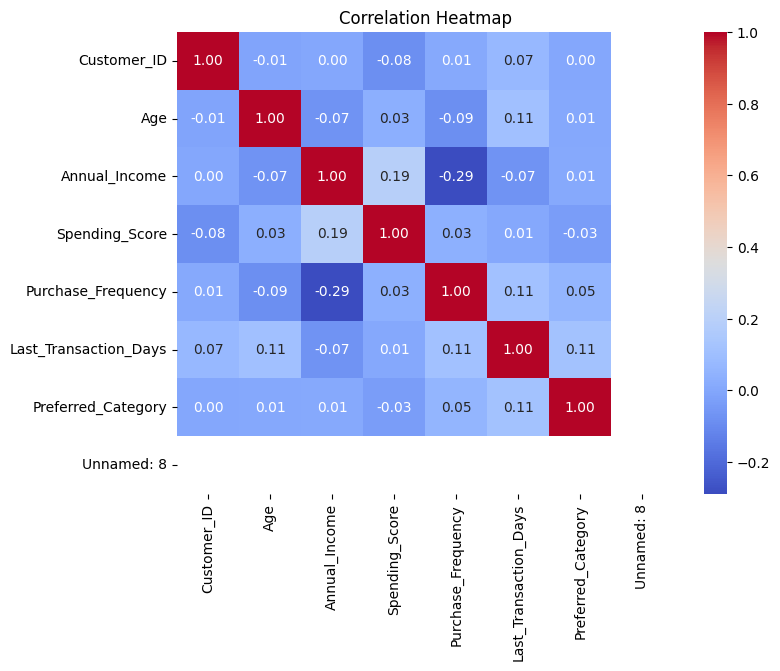

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'])
plt.title("Income vs Spending Score")
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

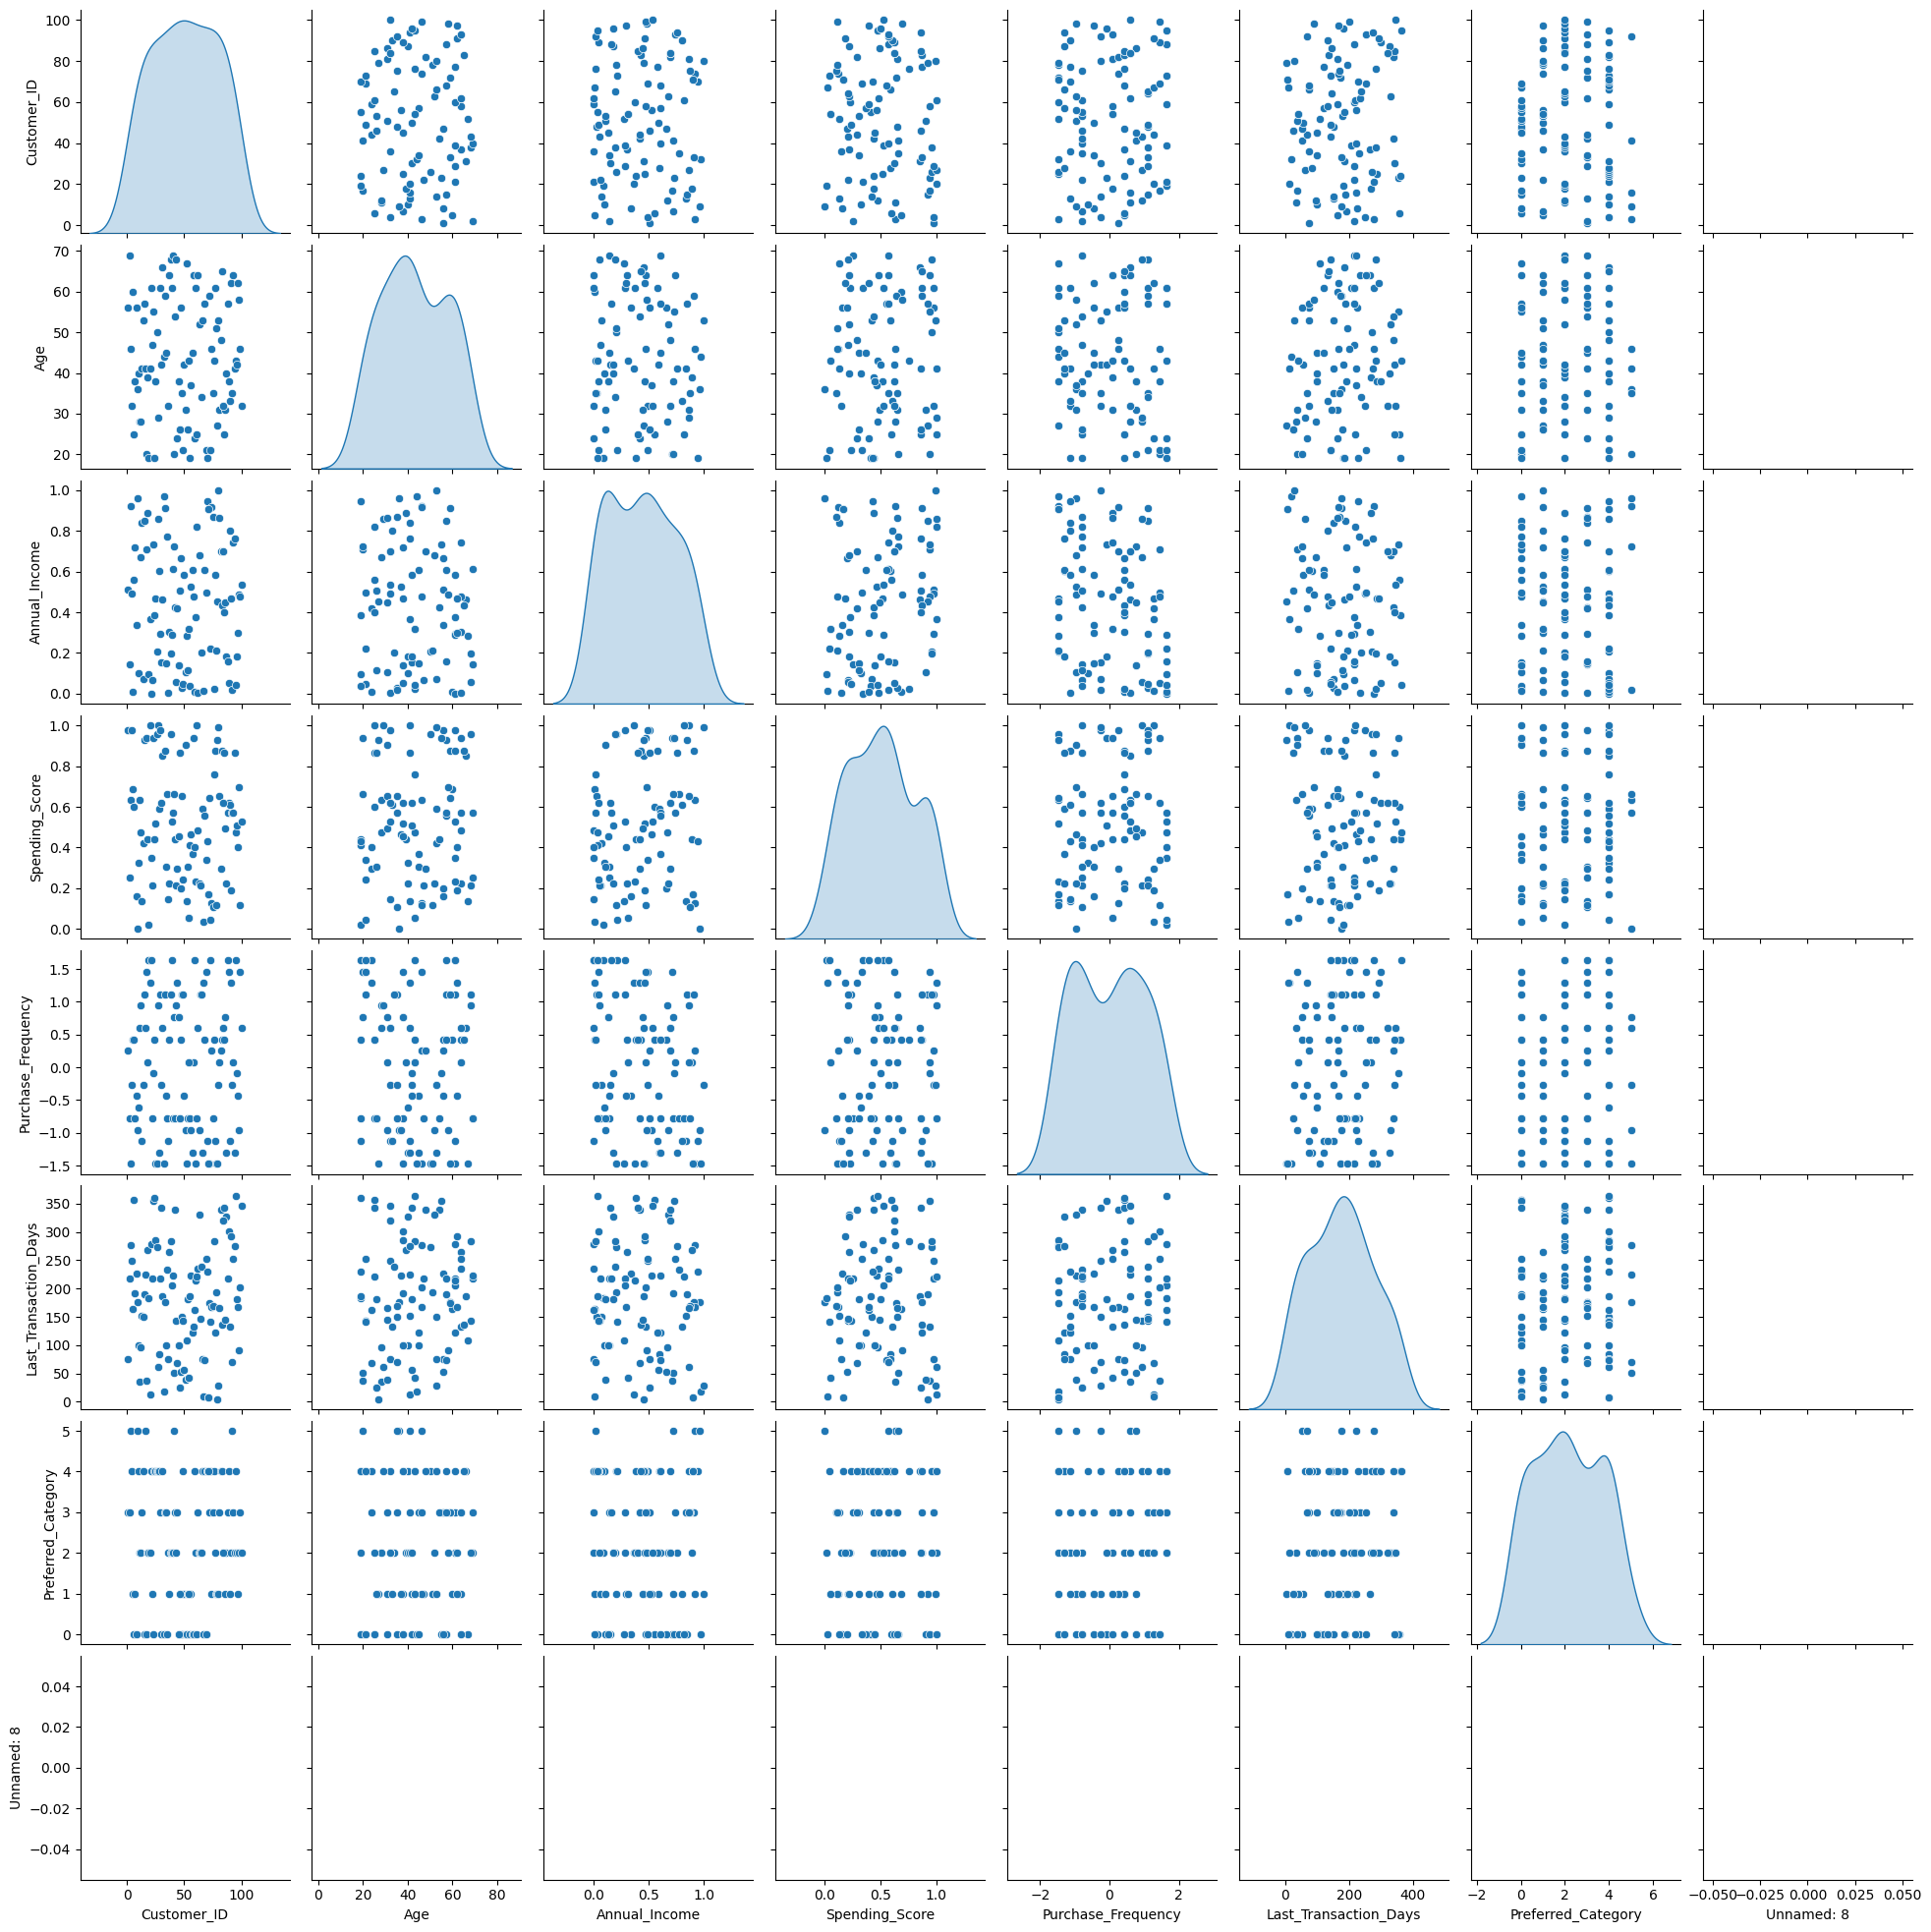

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind='kde')
plt.show()

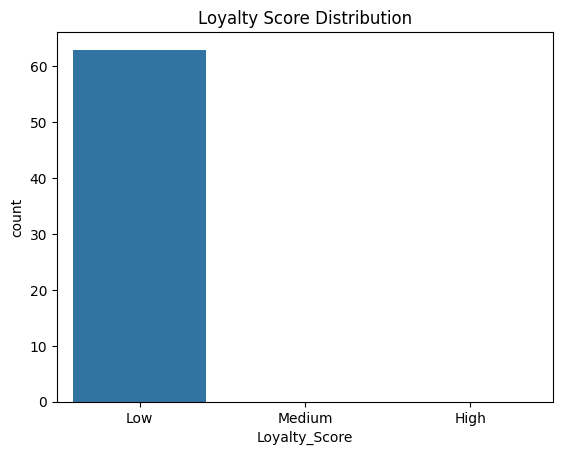

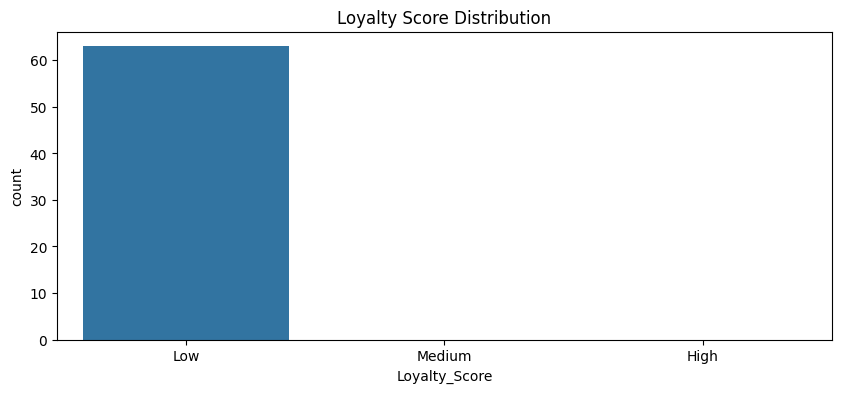

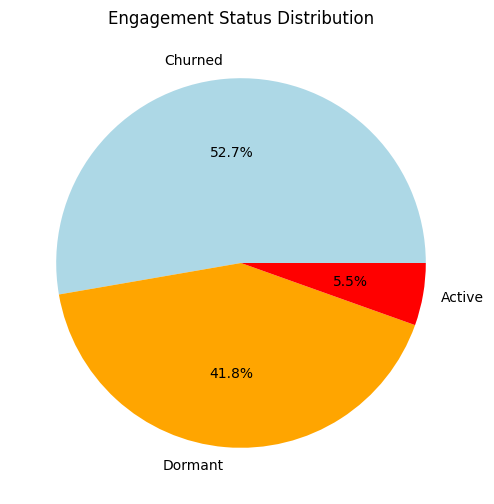

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['Loyalty_Score'] = pd.cut(df['Spending_Score'] + df['Purchase_Frequency'],
                             bins=[0, 50, 100, float('inf')],
                             labels=['Low', 'Medium', 'High'])

sns.countplot(x='Loyalty_Score', data=df)
plt.title('Loyalty Score Distribution')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='Loyalty_Score', data=df)
plt.title('Loyalty Score Distribution')
plt.show()

plt.figure(figsize=(6, 6))
df['Engagement_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange', 'red'])
plt.title('Engagement Status Distribution')
plt.ylabel('')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Annual_Income',
    y='Spending_Score',
    color='Loyalty_Score',
    hover_data=['Customer_ID', 'Purchase_Frequency'],
    title='Annual Income vs Spending Score'
)
fig.show()

In [ ]:

print("Missing Values Count:\n", df.isnull().sum())

Missing Values Count:
 Customer_ID                 0
Age                         6
Gender                      0
Annual_Income               5
Spending_Score              5
Purchase_Frequency          0
Last_Transaction_Days       0
Preferred_Category          0
Unnamed: 8                105
Unnamed: 9                104
Customer_Loyalty_Score      8
Income_Level                5
Engagement_Status          50
Loyalty_Score              42
dtype: int64


In [ ]:

from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("ecom.csv")
df.head()
df_dropped = df.dropna()
print("\nData after dropping missing values:\n", df_dropped)

Saving ecom.csv to ecom (3).csv

Data after dropping missing values:
 Empty DataFrame
Columns: [Customer_ID, Age, Gender, Annual_Income, Spending_Score, Purchase_Frequency, Last_Transaction_Days, Preferred_Category, Unnamed: 8, Unnamed: 9]
Index: []


In [ ]:

df_filled = df.copy()
df_filled['Age'].fillna(df_filled['Age'].mean(), inplace=True)  # Fill numerical with mean
df_filled['Annual_Income'].fillna(df_filled['Annual_Income'].mode()[0], inplace=True)  # Fill categorical with mode

print("\nData after filling missing values:\n", df_filled)


Data after filling missing values:
      Customer_ID        Age  Gender  Annual_Income  Spending_Score  \
0              1  56.000000    Male        71663.0            96.0   
1              2  69.000000    Male        35708.0            27.0   
2              3  46.000000    Male       111906.0            63.0   
3              4  32.000000    Male        69811.0            96.0   
4              5  60.000000    Male        22811.0            68.0   
..           ...        ...     ...            ...             ...   
100           84  32.000000  Female        90091.0            62.0   
101           54  43.000000    Male        52711.0             8.0   
102           71  43.242424    Male       110272.0            19.0   
103           46  26.000000  Female        71407.0            85.0   
104           45  38.000000  Female        35151.0            46.0   

     Purchase_Frequency  Last_Transaction_Days Preferred_Category  Unnamed: 8  \
0                    11                  

<ipython-input-14-c7886bd6f549>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-14-c7886bd6f549>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:
df_no_duplicates = df_filled.drop_duplicates()
print("\nData after dropping duplicates:\n", df_no_duplicates)


Data after dropping duplicates:
     Customer_ID   Age  Gender  Annual_Income  Spending_Score  \
0             1  56.0    Male        71663.0            96.0   
1             2  69.0    Male        35708.0            27.0   
2             3  46.0    Male       111906.0            63.0   
3             4  32.0    Male        69811.0            96.0   
4             5  60.0    Male        22811.0            68.0   
..          ...   ...     ...            ...             ...   
95           96  42.0    Male        39738.0            51.0   
96           97  62.0  Female        50746.0            41.0   
97           98  58.0  Female        69377.0            69.0   
98           99  46.0    Male        68404.0            14.0   
99          100  32.0  Female        74045.0            53.0   

    Purchase_Frequency  Last_Transaction_Days Preferred_Category  Unnamed: 8  \
0                   11                     75            Grocery         NaN   
1                    5               